This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [307]:
using LinearAlgebra
using Plots

In [308]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [309]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [310]:
function get_D_angle(D,n)
    angle= rad2deg(acos(D[n,n]))
    return angle
  end

get_D_angle (generic function with 1 method)

In [311]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [312]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([0.9619010131917474 1.0575499196162788 0.5779585387413266; -0.847272337936835 -1.2988607654224726 -0.9498522672025402; -0.3483357861877828 -0.07031921716819373 -0.6732445884304421], [1.0874244484151112 1.780612280745597 0.0; 0.0 1.9901590767154183 0.0; 2.705689811944757e-305 0.0 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.9925343149367096 -1.3792598972328083 -1.0874686301471113; -0.30724257005073047 -1.962991854839368 -1.6157920844537306; -0.019542194789199083 -0.752913064012313 -0.5741256756192996], [1.8268512333333555 0.6821295974702677 0.0; 0.0 1.2764234965222614 0.0; 2.705689811944757e-305 0.0 0.0]), [-0.08742444841511121 -0.8592676260072526; 0.9213446547383445 -0.2621253863148194; 0.37878885015849384 0.4392600923657495], [0.5040001118205962; -0.2870789247478594; 0.8145978015256604;;], [-0.8268512333333555 -0.12084312944058084; 0.5612864680296868 -0.23929534285996423; 0.035700

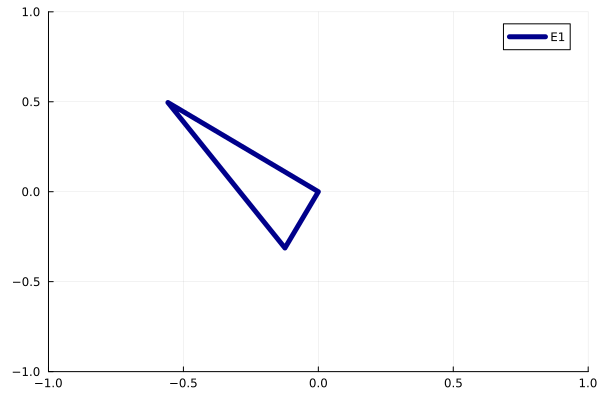

In [313]:
points=draw(E1*U1*V1',n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1], lc=:darkblue,lw=5, label="E1", legend=:topright)

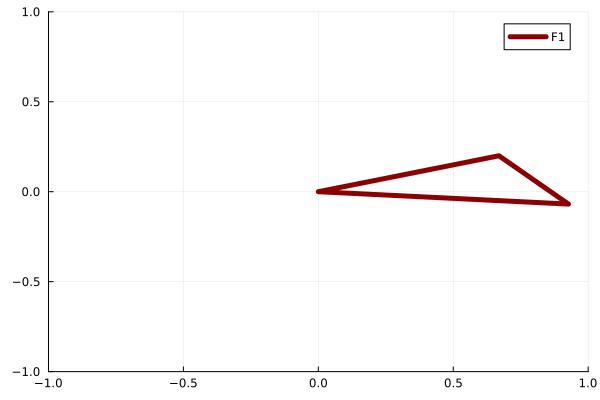

In [314]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1] , lc=:darkred,lw=5, label="F1", legend=:topright)

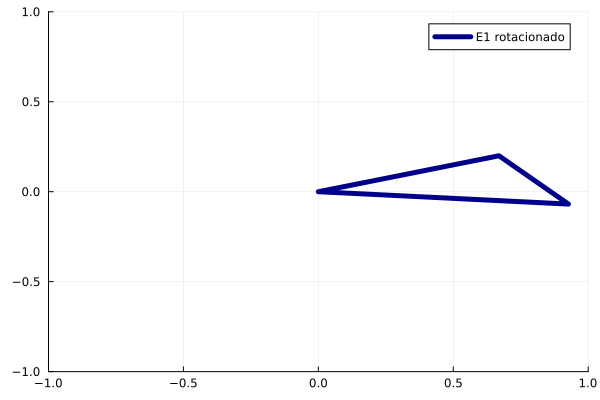

In [315]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1*V1', n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1] , lc=:darkblue ,lw=5, label="E1 rotacionado", legend=:topright)

In [316]:
display(get_D_angle(D,n))
display(D)


74.58402438285206

3×3 Matrix{Float64}:
  1.0          5.55112e-17   1.61911e-16
  8.32667e-17  0.265825     -0.964021
 -3.94582e-16  0.964021      0.265825

[I   0   0\
 0   C   -S\
 0   S    C]

In [317]:

function smooth_transition()
    W, U, U1, U2, V1, V2, D = cs_decomposition(n, E, F, E1, E2, F1, F2)
    max_angle = get_D_angle(D, n)
    if(D[2,3]<0)
        i=1
    else
        i=-1
    end
    anim = @animate for angle in 0:1:max_angle
        D[2,2] = cosd(angle)
        D[2,3] = -i*sind(angle)
        D[3,2] = i*sind(angle)
        D[3,3] = cosd(angle)
        #display(D)
        W = E * U * D * U' * E'
        points = draw(W*E1*U1*V1' , n)
        plot(points[1, :], points[2, :], xlim = [-1, 1], ylim = [-1, 1], legend = true, label = "Angle: $angle", lc=:darkblue, lw=5)
    end
    gif(anim, "smooth_transition.gif", fps = 10) # Save the animation as a GIF
end

smooth_transition (generic function with 1 method)

┌ Info: Saved animation to d:\Docs matheus\UFRJ\IC\Códigos\CSD-Polygons\smooth_transition.gif
└ @ Plots C:\Users\mathe\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("d:\\Docs matheus\\UFRJ\\IC\\Códigos\\CSD-Polygons\\smooth_transition.gif")
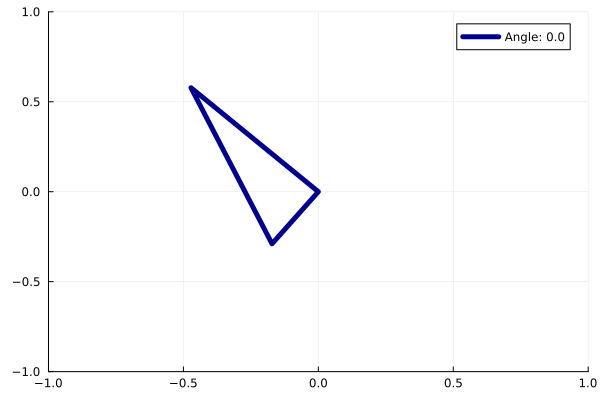

In [318]:
smooth_transition()

In [319]:
rad2deg(acos(0.5))
deg2rad(60)

1.0471975511965976